# Zoológico das Distribuições

Segue uma amostra das principais distribuições contínuas.

**Objetivos:**

1. Ver como é o formato de cada distribuição.
2. Entender como funcionam as funções `rvs()`, `pdf()` e `cdf()`, comuns a todas as distribuições.
2. Vericar que a média e o desvio padrão dos dados gerados via `rvs()` são semelhantes aos valores teóricos.
3. Entender como a variação dos parâmetros da distribuição afeta a forma das curvas.


**Como ler esse notebook:**

1. Acessar o link da wikipedia da distribuição. Olhar a função densidade de probabilidade (fdp ou cdf) e os parâmetros de cada distribuição.
2. Acessar o link do `scipy.stats.distrib` para ver como usar as funções de cada distribuição.
3. O código fará uma paralelo entre a fórmula da função densidade de probabilidade com a função no scipy.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *
import math

n = 10000

### UNIFORME - scipy.stats.uniform
https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)

Valores teóricos vs Valores simulados:
média:  1.0  vs  0.991494194374
dp:  0.5773502691896258  vs  0.580574537952


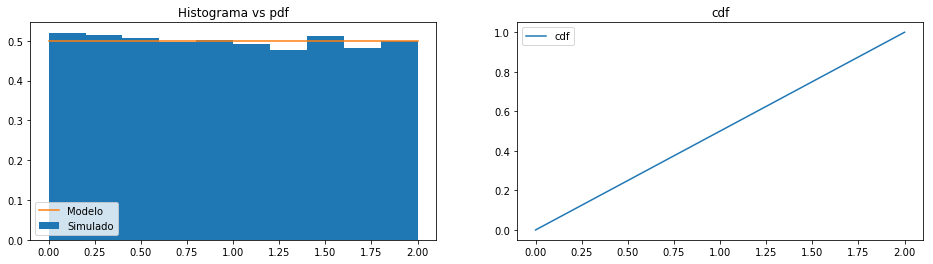

In [2]:
#valores assumidos para validação
a = 0
b = 2

#média:
mu = (a+b)/2
#desvio padrão:
sigma = (b-a)/math.sqrt(12)

#fazer a relação entre loc e scale com mu e sigma
loc = a
scale = b - a

#Gerar n dados:
X = uniform.rvs(loc,scale,n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

fig, ax = plt.subplots(1, 2, figsize = (16,4))

#Histograma vs pdf
ax[0].hist(X, normed = True)
x = np.arange(a, b+0.1, 0.1) #valores de acordo com limites da Uniforme teórica
ax[0].plot(x, uniform.pdf(x, loc, scale))
ax[0].set_title('Histograma vs pdf')
ax[0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[1].plot(x, uniform.cdf(x, loc, scale))
ax[1].set_title('cdf')
ax[1].legend(['cdf'])

plt.show()

### EXPONENCIAL - scipy.stats.expon
https://en.wikipedia.org/wiki/Exponential_distribution

Valores teóricos vs Valores simulados:
média:  0.5  vs  0.495195422253
dp:  0.5  vs  0.502716396297


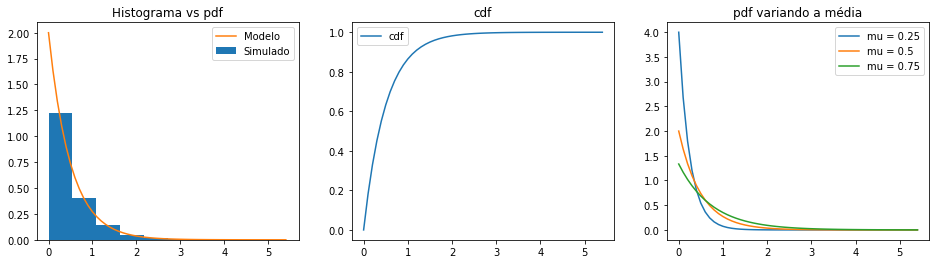

In [3]:
#valores assumidos para validação
lamb = 2
mu = 1/lamb
sigma = 1/lamb

#fazer a relação entre loc e scale com mu e sigma
loc = 0
scale = mu

#Gerar n dados:
X = expon.rvs(loc,scale,n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

#Plots
fig, ax = plt.subplots(1, 3, figsize = (16,4))

#Histograma vs pdf
ax[0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0].plot(x, expon.pdf(x, loc, scale))
ax[0].set_title('Histograma vs pdf')
ax[0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[1].plot(x, expon.cdf(x, loc, scale))
ax[1].set_title('cdf')
ax[1].legend(['cdf'])

#Variando mu
ax[2].plot(x, expon.pdf(x, loc, scale-0.25))
ax[2].plot(x, expon.pdf(x, loc, scale))
ax[2].plot(x, expon.pdf(x, loc, scale+0.25))
ax[2].set_title('pdf variando a média')
ax[2].legend(['mu = 0.25','mu = 0.5','mu = 0.75'])

plt.show()

### GAUSSIANA/NORMAL - scipy.stats.norm

Valores teóricos vs Valores simulados:
média:  3  vs  3.03786583481
dp:  2  vs  2.00555041476


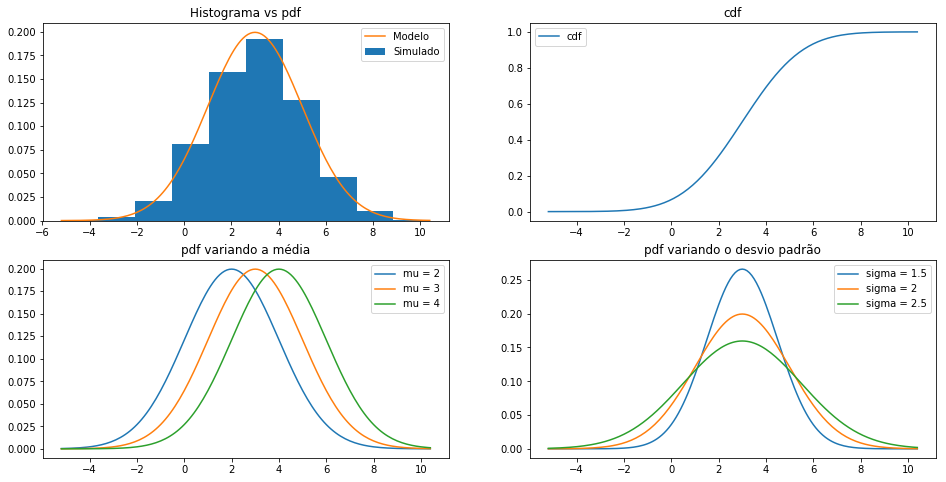

In [4]:
#valores assumidos para validação
#média:
mu = 3
#desvio padrão:
sigma = 2 

#fazer a relação entre loc e scale com mu e sigma
loc = mu
scale = sigma

#Gerar n dados:
X = norm.rvs(loc,scale,n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

#Plots
fig, ax = plt.subplots(2, 2, figsize = (16,8))

#Histograma vs pdf
ax[0, 0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0, 0].plot(x, norm.pdf(x, loc, scale))
ax[0, 0].set_title('Histograma vs pdf')
ax[0, 0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[0, 1].plot(x, norm.cdf(x, loc, scale))
ax[0, 1].set_title('cdf')
ax[0, 1].legend(['cdf'])

#Variando mu
ax[1, 0].plot(x, norm.pdf(x, loc-1, scale))
ax[1, 0].plot(x, norm.pdf(x, loc, scale))
ax[1, 0].plot(x, norm.pdf(x, loc+1, scale))
ax[1, 0].set_title('pdf variando a média')
ax[1, 0].legend(['mu = 2','mu = 3','mu = 4'])

#Variando sigma
ax[1, 1].plot(x, norm.pdf(x, loc, scale-0.5))
ax[1, 1].plot(x, norm.pdf(x, loc, scale))
ax[1, 1].plot(x, norm.pdf(x, loc, scale+0.5))
ax[1, 1].set_title('pdf variando o desvio padrão')
ax[1, 1].legend(['sigma = 1.5','sigma = 2','sigma = 2.5'])

plt.show()

### T-STUDENT scipy.stats.t
https://en.wikipedia.org/wiki/Student%27s_t-distribution

Valores teóricos vs Valores simulados:
média:  0  vs  -0.0120300231584
dp:  1.118033988749895  vs  1.12037981752


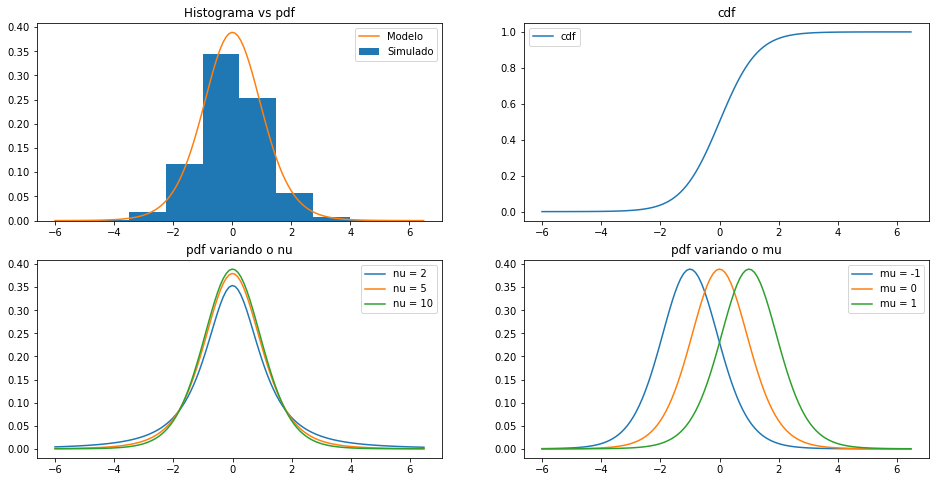

In [5]:
#valores assumidos para validação
nu = 10

mu = 0
sigma = math.sqrt(nu/(nu-2))

#fazer a relação entre loc e scale com mu e sigma
df = nu
loc = 0
scale = 1

#Gerar n dados:
X = t.rvs(df, loc, scale, n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

#Plots
fig, ax = plt.subplots(2, 2, figsize = (16,8))

#Histograma vs pdf
ax[0, 0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0, 0].plot(x, t.pdf(x, df, loc, scale))
ax[0, 0].set_title('Histograma vs pdf')
ax[0, 0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[0, 1].plot(x, t.cdf(x, df, loc, scale))
ax[0, 1].set_title('cdf')
ax[0, 1].legend(['cdf'])

#Variando nu
ax[1, 0].plot(x, t.pdf(x, df-8, loc, scale))
ax[1, 0].plot(x, t.pdf(x, df-5, loc, scale))
ax[1, 0].plot(x, t.pdf(x, df, loc, scale))
ax[1, 0].set_title('pdf variando o nu')
ax[1, 0].legend(['nu = 2','nu = 5','nu = 10'])

#Variando mu
ax[1, 1].plot(x, t.pdf(x, df, loc-1, scale))
ax[1, 1].plot(x, t.pdf(x, df, loc, scale))
ax[1, 1].plot(x, t.pdf(x, df, loc+1, scale))
ax[1, 1].set_title('pdf variando o mu')
ax[1, 1].legend(['mu = -1','mu = 0','mu = 1'])

plt.show()

### CHI-QUADRADO scipy.stats.chi2
https://en.wikipedia.org/wiki/Chi-squared_distribution

Valores teóricos vs Valores simulados:
média:  5  vs  4.97911576498
dp:  3.1622776601683795  vs  3.16469686844


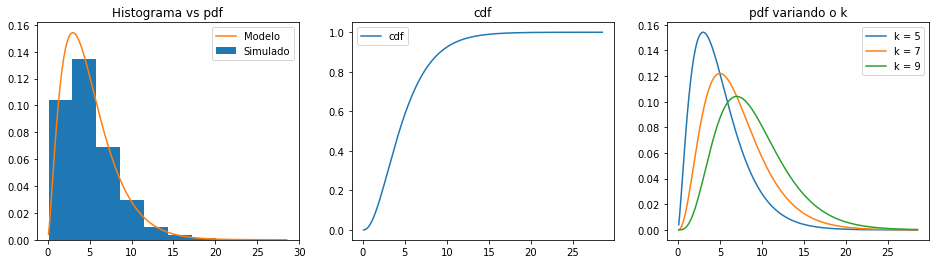

In [6]:
#valores assumidos para validação
k = 5
mu = k
sigma = math.sqrt(2*k)

#fazer a relação entre loc e scale com mu e sigma
df = k
loc = 0
scale = 1

#Gerar n dados:
X = chi2.rvs(df, loc, scale, n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

#Plots
fig, ax = plt.subplots(1, 3, figsize = (16,4))

#Histograma vs pdf
ax[0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0].plot(x, chi2.pdf(x, df, loc, scale))
ax[0].set_title('Histograma vs pdf')
ax[0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[1].plot(x, chi2.cdf(x, df, loc, scale))
ax[1].set_title('cdf')
ax[1].legend(['cdf'])

#Variando k
ax[2].plot(x, chi2.pdf(x, df, loc, scale))
ax[2].plot(x, chi2.pdf(x, df+2, loc, scale))
ax[2].plot(x, chi2.pdf(x, df+4, loc, scale))
ax[2].set_title('pdf variando o k')
ax[2].legend(['k = 5','k = 7','k = 9'])

plt.show()

### F-SNEDECOR  scipy.stats.f
https://en.wikipedia.org/wiki/F-distribution

Valores teóricos vs Valores simulados:
média:  1.1111111111111112  vs  1.11923109299
dp:  0.5152010275275392  vs  0.522819197723


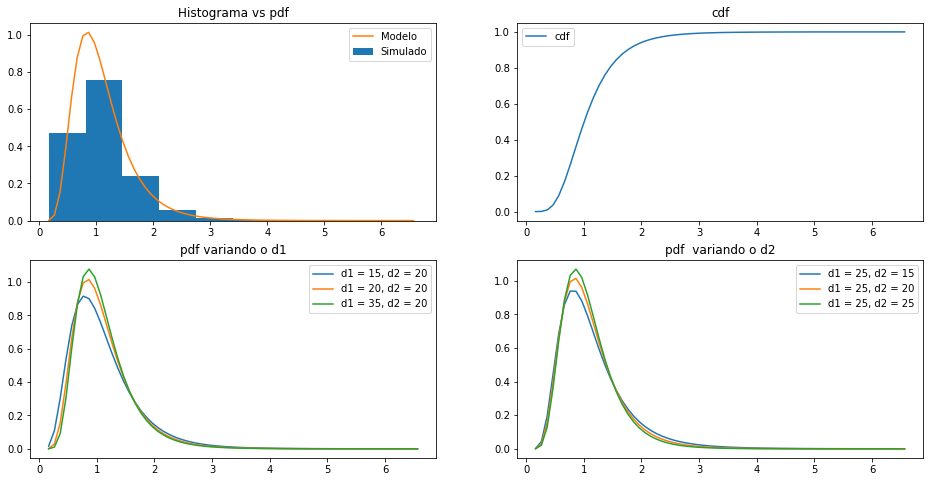

In [7]:
#valores assumidos para validação
d1 = 25
d2 = 20

mu = d2/(d2-2)
sigma = math.sqrt((2*d2**2*(d1+d2-2))/(d1*(d2-2)**2*(d2-4)))

#fazer a relação entre loc e scale com mu e sigma
dfn = d1
dfd = d2
loc = 0
scale = 1

#Gerar n dados:
X = f.rvs(dfn, dfd, loc, scale, n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

#Plots
fig, ax = plt.subplots(2, 2, figsize = (16,8))

#Histograma vs pdf
ax[0, 0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0, 0].plot(x, f.pdf(x, dfn, dfd, loc, scale))
ax[0, 0].set_title('Histograma vs pdf')
ax[0, 0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[0, 1].plot(x, f.cdf(x, dfn, dfd, loc, scale))
ax[0, 1].set_title('cdf')
ax[0, 1].legend(['cdf'])

#Variando d1
ax[1, 0].plot(x, f.pdf(x, dfn-10, dfd, loc, scale))
ax[1, 0].plot(x, f.pdf(x, dfn, dfd, loc, scale))
ax[1, 0].plot(x, f.pdf(x, dfn+10, dfd, loc, scale))
ax[1, 0].set_title('pdf variando o d1')
ax[1, 0].legend(['d1 = 15, d2 = 20','d1 = 20, d2 = 20','d1 = 35, d2 = 20'])

#Variando d2
ax[1, 1].plot(x, f.pdf(x, dfn, dfd-5, loc, scale))
ax[1, 1].plot(x, f.pdf(x, dfn, dfd, loc, scale))
ax[1, 1].plot(x, f.pdf(x, dfn, dfd+5, loc, scale))
ax[1, 1].set_title('pdf  variando o d2')
ax[1, 1].legend(['d1 = 25, d2 = 15','d1 = 25, d2 = 20','d1 = 25, d2 = 25'])

plt.show()

### GAMMA  scipy.stats.gamma
https://en.wikipedia.org/wiki/Gamma_distribution

Valores teóricos vs Valores simulados:
média:  7.0  vs  6.99825040366
dp:  4.949747468305833  vs  4.91479992054


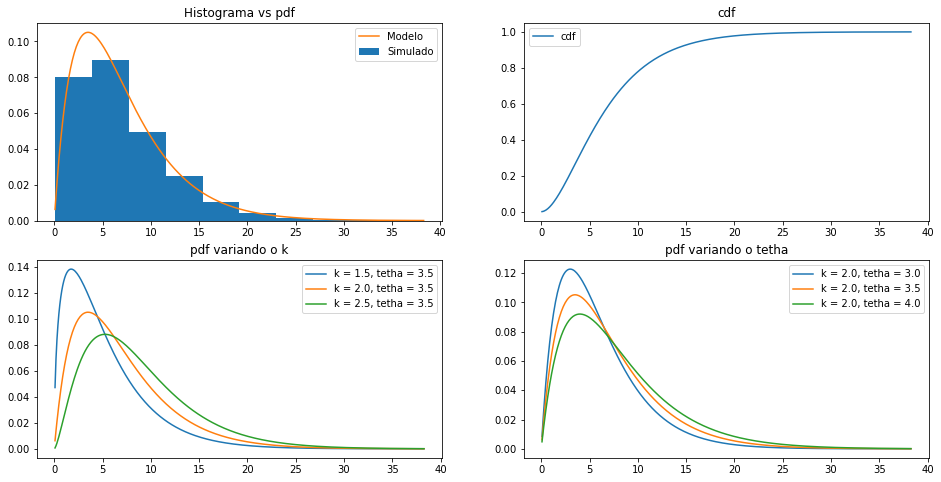

In [8]:
#valores assumidos para validação
k = 2
tetha = 3.5
mu = k*tetha
sigma = math.sqrt(k)*tetha

#fazer a relação entre loc e scale com mu e sigma
a = k
loc = 0
scale = tetha

#Gerar n dados:
X = gamma.rvs(a, loc, scale, n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

#Plots
fig, ax = plt.subplots(2, 2, figsize = (16,8))

#Histograma vs pdf
ax[0, 0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0, 0].plot(x, gamma.pdf(x, a, loc, scale))
ax[0, 0].set_title('Histograma vs pdf')
ax[0, 0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[0, 1].plot(x, gamma.cdf(x, a, loc, scale))
ax[0, 1].set_title('cdf')
ax[0, 1].legend(['cdf'])

#Variando k
ax[1, 0].plot(x, gamma.pdf(x, a-0.5, loc, scale))
ax[1, 0].plot(x, gamma.pdf(x, a, loc, scale))
ax[1, 0].plot(x, gamma.pdf(x, a+0.5, loc, scale))
ax[1, 0].set_title('pdf variando o k')
ax[1, 0].legend(['k = 1.5, tetha = 3.5','k = 2.0, tetha = 3.5','k = 2.5, tetha = 3.5'])

#Variando tetha
ax[1, 1].plot(x, gamma.pdf(x, a, loc, scale-0.5))
ax[1, 1].plot(x, gamma.pdf(x, a, loc, scale))
ax[1, 1].plot(x, gamma.pdf(x, a, loc, scale+0.5))
ax[1, 1].set_title('pdf variando o tetha')
ax[1, 1].legend(['k = 2.0, tetha = 3.0','k = 2.0, tetha = 3.5','k = 2.0, tetha = 4.0'])

plt.show()

### LOGNORMAL  scipy.stats.lognorm
https://en.wikipedia.org/wiki/Log-normal_distribution

Valores teóricos vs Valores simulados:
média:  168.17414165184545  vs  168.788258489
dp:  89.62678591755734  vs  90.2903365368


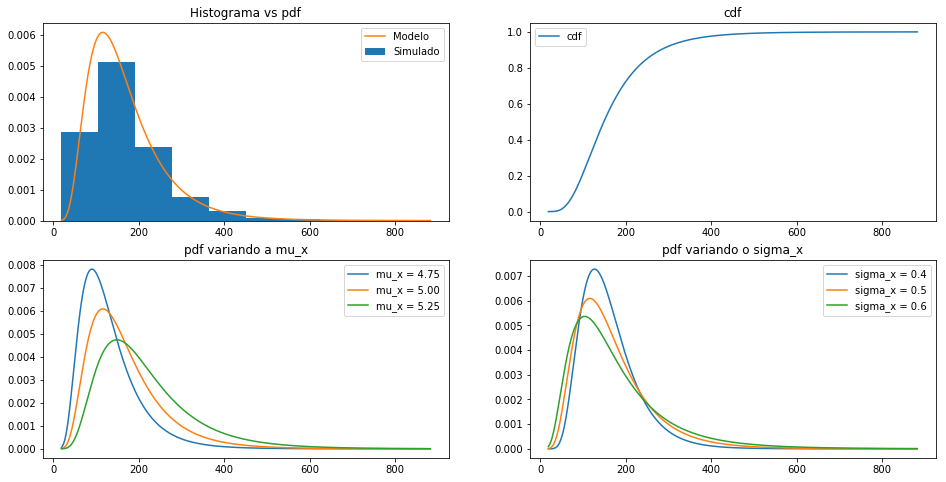

In [9]:
#valores assumidos para validação
#Assumir que X ~ N(mu_x, sigma_x**2) e que queremos obter ln(X)
mu_x = 5
sigma_x = 0.5

mu = math.exp(mu_x+sigma_x**2/2)
sigma = math.sqrt((math.exp(sigma_x**2)-1)*math.exp(2*mu_x+sigma_x**2))

#fazer a relação entre loc e scale com mu e sigma
s = sigma_x
loc = 0
scale = math.exp(mu_x)

#Gerar n dados:
X = lognorm.rvs(s, loc, scale, n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

#Plots
fig, ax = plt.subplots(2, 2, figsize = (16,8))

#Histograma vs pdf
ax[0, 0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0, 0].plot(x, lognorm.pdf(x, s, loc, scale))
ax[0, 0].set_title('Histograma vs pdf')
ax[0, 0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[0, 1].plot(x, lognorm.cdf(x, s, loc, scale))
ax[0, 1].set_title('cdf')
ax[0, 1].legend(['cdf'])

#Variando mu_x
ax[1, 0].plot(x, lognorm.pdf(x, s, loc, math.exp(mu_x-0.25)))
ax[1, 0].plot(x, lognorm.pdf(x, s, loc, math.exp(mu_x)))
ax[1, 0].plot(x, lognorm.pdf(x, s, loc, math.exp(mu_x+0.25)))
ax[1, 0].set_title('pdf variando a mu_x')
ax[1, 0].legend(['mu_x = 4.75','mu_x = 5.00','mu_x = 5.25'])

#Variando sigma_x
ax[1, 1].plot(x, lognorm.pdf(x, s-0.1, loc, scale))
ax[1, 1].plot(x, lognorm.pdf(x, s, loc, scale))
ax[1, 1].plot(x, lognorm.pdf(x, s+0.1, loc, scale))
ax[1, 1].set_title('pdf variando o sigma_x')
ax[1, 1].legend(['sigma_x = 0.4','sigma_x = 0.5','sigma_x = 0.6'])

plt.show()

### WEIBULL  scipy.stats.weibull_min/scipy.stats.weibull_max
https://en.wikipedia.org/wiki/Weibull_distribution<br />
usar a classe weibull_min ou weibull_max dependendo da assimetria

Valores teóricos vs Valores simulados:
média:  0.886226925452758  vs  0.881612823454
dp:  0.46325137517610415  vs  0.462988981064


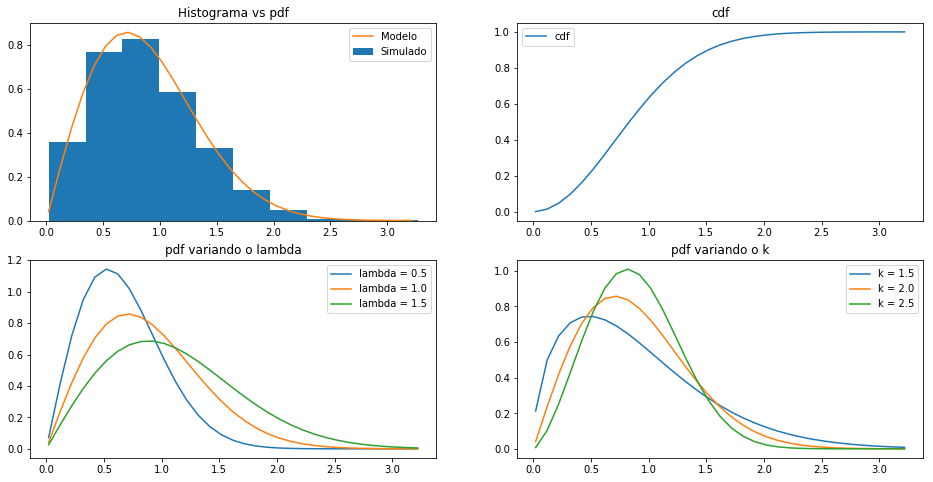

In [10]:
#valores assumidos para validação
lamb = 1
k = 2
mu = lamb*math.gamma(1+1/k) 
sigma = lamb*math.sqrt(math.gamma(1+2/k)-math.gamma(1+1/k)**2)

#fazer a relação entre loc e scale com mu e sigma
c = k
loc = 0
scale = lamb

#Gerar n dados:
X = weibull_min.rvs(c, loc, scale, n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

#Plots
fig, ax = plt.subplots(2, 2, figsize = (16,8))

#Histograma vs pdf
ax[0, 0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0, 0].plot(x, weibull_min.pdf(x, c, loc, scale))
ax[0, 0].set_title('Histograma vs pdf')
ax[0, 0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[0, 1].plot(x, weibull_min.cdf(x, c, loc, scale))
ax[0, 1].set_title('cdf')
ax[0, 1].legend(['cdf'])

#Variando lambda
ax[1, 0].plot(x, weibull_min.pdf(x, c, loc, scale-0.25))
ax[1, 0].plot(x, weibull_min.pdf(x, c, loc, scale))
ax[1, 0].plot(x, weibull_min.pdf(x, c, loc, scale+0.25))
ax[1, 0].set_title('pdf variando o lambda')
ax[1, 0].legend(['lambda = 0.5','lambda = 1.0','lambda = 1.5'])

#Variando k
ax[1, 1].plot(x, weibull_min.pdf(x, c-0.5, loc, scale))
ax[1, 1].plot(x, weibull_min.pdf(x, c, loc, scale))
ax[1, 1].plot(x, weibull_min.pdf(x, c+0.5, loc, scale))
ax[1, 1].set_title('pdf variando o k')
ax[1, 1].legend(['k = 1.5','k = 2.0','k = 2.5'])

plt.show()

### RAYLEIGH  scipy.stats.rayleigh
https://en.wikipedia.org/wiki/Rayleigh_distribution

Valores teóricos vs Valores simulados:
média:  5.0132565492620005  vs  4.95670604875
dp:  2.6205455102481343  vs  2.6088615335


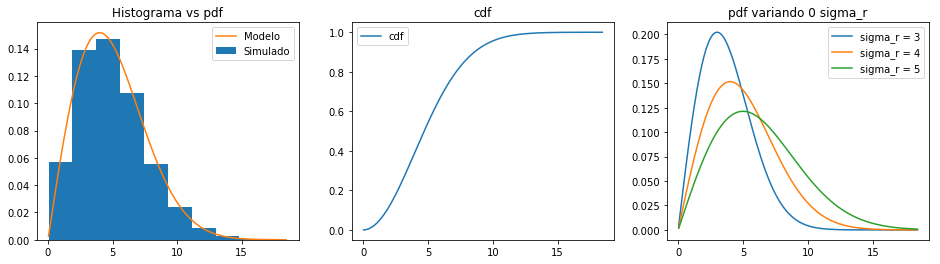

In [11]:
#valores assumidos para validação
sigma_r = 4

mu = sigma_r*math.sqrt(math.pi/2)
sigma = sigma_r*math.sqrt((4-math.pi)/2)

#fazer a relação entre loc e scale com mu e sigma
loc = 0
scale = sigma_r

#Gerar n dados:
X = rayleigh.rvs(loc, scale, n)

#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', X.mean())
print('dp: ', sigma, ' vs ', X.std())

#Plots
fig, ax = plt.subplots(1, 3, figsize = (16,4))

#Histograma vs pdf
ax[0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax[0].plot(x, rayleigh.pdf(x, loc, scale))
ax[0].set_title('Histograma vs pdf')
ax[0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[1].plot(x, rayleigh.cdf(x, loc, scale))
ax[1].set_title('cdf')
ax[1].legend(['cdf'])

#Variando sigma_r
ax[2].plot(x, rayleigh.pdf(x, loc, scale-1))
ax[2].plot(x, rayleigh.pdf(x, loc, scale))
ax[2].plot(x, rayleigh.pdf(x, loc, scale+1))
ax[2].set_title('pdf variando 0 sigma_r')
ax[2].legend(['sigma_r = 3','sigma_r = 4','sigma_r = 5'])

plt.show()

### CAUCHY  scipy.stats.cauchy
https://en.wikipedia.org/wiki/Cauchy_distribution

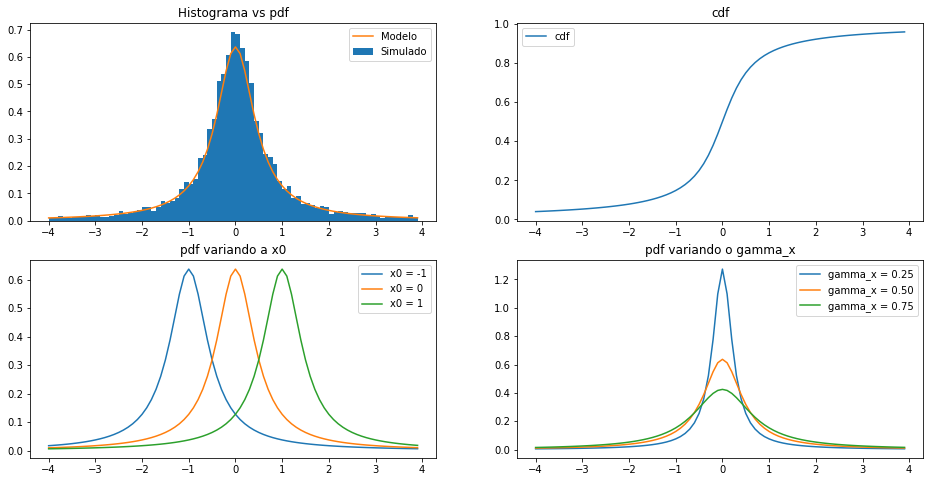

In [12]:
#valores assumidos para validação
x0 = 0
gamma_x = 0.5

mu = float('nan')
sigma = float('nan')

#fazer a relação entre loc e scale com mu e sigma
loc = x0
scale = gamma_x

#Gerar n dados:
X = cauchy.rvs(loc, scale, n)

#Validando os valores da saída:
#Olhe o pdf e procure o professor de MatVar. Boa sorte!

#Plots
fig, ax = plt.subplots(2, 2, figsize = (16,8))

#Histograma vs pdf
x = np.arange(-4, 4, 0.1)
ax[0, 0].hist(X, bins=x, normed = True)
ax[0, 0].plot(x, cauchy.pdf(x, loc, scale))
ax[0, 0].set_title('Histograma vs pdf')
ax[0, 0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[0, 1].plot(x, cauchy.cdf(x, loc, scale))
ax[0, 1].set_title('cdf')
ax[0, 1].legend(['cdf'])

#Variando x0
ax[1, 0].plot(x, cauchy.pdf(x, loc-1, scale))
ax[1, 0].plot(x, cauchy.pdf(x, loc, scale))
ax[1, 0].plot(x, cauchy.pdf(x, loc+1, scale))
ax[1, 0].set_title('pdf variando a x0')
ax[1, 0].legend(['x0 = -1','x0 = 0','x0 = 1'])

#Variando gamma_x
ax[1, 1].plot(x, cauchy.pdf(x, loc, scale-0.25))
ax[1, 1].plot(x, cauchy.pdf(x, loc, scale))
ax[1, 1].plot(x, cauchy.pdf(x, loc, scale+0.25))
ax[1, 1].set_title('pdf variando o gamma_x')
ax[1, 1].legend(['gamma_x = 0.25','gamma_x = 0.50','gamma_x = 0.75'])

plt.show()